# Alphabet

plot_imagesdel to generate Fonts!

In [1]:
import wandb
from utils import get_alphabet
from ddpm_conditional import *

In [2]:
run = wandb.init(project="train_fonts", job_type="evaluate")
artifact = run.use_artifact('capecape/train_fonts/model:v10', type='model')
artifact_dir = artifact.download()

11:32:47 - ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: capecape. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact model:v10, 239.28MB. 3 files... 
wandb:   3 of 3 files downloaded.  
Done. 0:0:0.0


In [3]:
model_cpkt_path = Path(artifact_dir)

In [4]:
config.epochs = 100
config.noise_steps = 1000
config.num_classes = 26
config.img_size = 32
config.batch_size = 320
config.slice_size = 1
config.log_every_epoch = 2

train_dl, _ = get_alphabet(config)

Load the diffusion class

In [5]:
adiff = Diffusion(config.noise_steps, img_size=config.img_size, num_classes=config.num_classes, c_in=1, c_out=1, remove_deep_conv=True)

load the checkpoint

In [6]:
adiff.load(model_cpkt_path)

## Inference

In [ ]:
N = 4

In [202]:
labels = torch.arange(26).long().cuda().repeat(N)

In [203]:
samples = adiff.sample(True, len(labels), labels)

11:09:51 - INFO: Sampling 104 new images....


In [204]:
def show(x): 
    x = 1 - torch.clamp(x.float()/255, 0.5)
    return wandb.Image(x).image

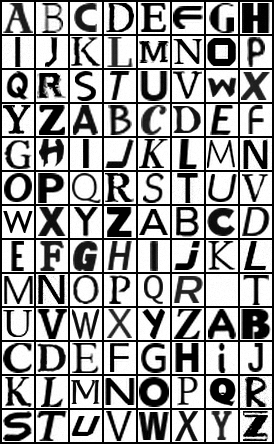

In [205]:
show(samples)

In [206]:
def wandb_bw_image(tensor_image, value=0.5):
    float_image = tensor_image.float() / 255
    float_image = 1 - float_image.clamp(min=value)
    return wandb.Image(float_image)

In [207]:
table = wandb.Table(columns=[*alphabet_labels])
for s in samples.reshape(N,-1,32,32):
    table.add_data(*[wandb_bw_image(c) for c in s])

In [208]:
wandb.log({"prediction_samples": table})

### W&B

In [214]:
N = 80

In [218]:
labels = torch.tensor([22, 1]).long().cuda().repeat(N)

In [219]:
samples = adiff.sample(True, len(labels), labels)

11:16:32 - INFO: Sampling 160 new images....


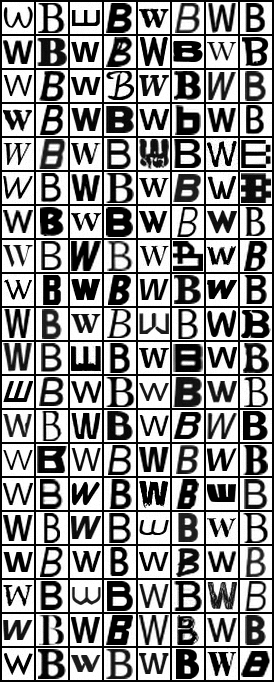

In [220]:
show(samples)

In [221]:
table = wandb.Table(columns=["W", "B"])
for s in samples.reshape(N,-1,32,32):
    table.add_data(*[wandb_bw_image(c) for c in s])

In [222]:
wandb.log({"wb_samples": table})

In [223]:
wandb.finish()